In [36]:
import sys
sys.path.append('/Users/wwymak/code_experiments/')
from default_py_imports.core import *

In [41]:
sns.set()

In [7]:
DATA_DIR = Path('./data')

In [8]:
os.listdir(DATA_DIR)

['listings.csv.gz',
 'calendar.csv.gz',
 'neighbourhoods.geojson',
 'reviews.csv.gz',
 'neighbourhoods.csv']

In [31]:
listings = pd.read_csv(DATA_DIR/'listings.csv.gz')

In [12]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,...,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-11-07,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,t,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,https://www.airbnb.com/rooms/3309,20181107122246,2018-11-07,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,https://www.airbnb.com/rooms/7071,20181107122246,2018-11-07,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,none,"Great neighborhood with plenty of Cafés, Baker...",...,t,NaN,NaN,f,f,moderate,f,f,1,1.75


In [13]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [15]:
listings.last_scraped = pd.to_datetime(listings.last_scraped)

In [19]:
listings.zipcode.isnull().sum()

656

In [20]:
listings.neighbourhood_group_cleansed.isnull().sum()

0

In [21]:
listings.neighbourhood_group_cleansed.value_counts()

Friedrichshain-Kreuzberg    5497
Mitte                       4631
Pankow                      3541
Neukölln                    3499
Charlottenburg-Wilm.        1592
Tempelhof - Schöneberg      1560
Lichtenberg                  688
Treptow - Köpenick           595
Steglitz - Zehlendorf        437
Reinickendorf                247
Marzahn - Hellersdorf        141
Spandau                      124
Name: neighbourhood_group_cleansed, dtype: int64

In [35]:
def currency_item_to_str(currency_str):
    if type(currency_str) == float:
        return currency_str
    else:
        return currency_str.replace('$', '').replace(',', '')
for col in ['price', 'weekly_price', 'monthly_price']:
    listings[col] = listings[col].apply(lambda x: currency_item_to_str(x))
    listings[col] = listings[col].astype(float)
    print(listings[col].head())

0    60.00
1    17.00
2    90.00
3    26.00
4    42.00
Name: price, dtype: object
0       NaN
1       NaN
2    520.00
3    175.00
4       NaN
Name: weekly_price, dtype: object
0        NaN
1        NaN
2    1900.00
3     599.00
4        NaN
Name: monthly_price, dtype: object


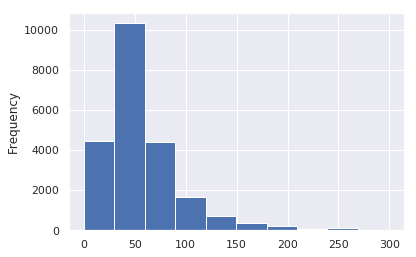

In [48]:
listings.price[listings.price < 300].plot.hist()

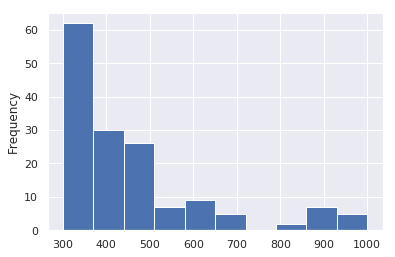

In [50]:
listings.price[(listings.price >= 300) & (listings.price <= 1000)].plot.hist()

In [54]:
listings[listings.price > 1000]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
766,810056,https://www.airbnb.com/rooms/810056,20181107122246,2018-11-07,20m2 of relaxation ***,Dear travellers - I'm renting out a 20 sq mete...,"Atelier/Logement de 52 M2, au 3ème étage d'un ...",Dear travellers - I'm renting out a 20 sq mete...,none,Ici c'est tous les jours dimanche.,...,t,NaN,NaN,f,f,flexible,f,f,4,0.74
1990,2860420,https://www.airbnb.com/rooms/2860420,20181107122246,2018-11-07,250 qm penthouse with roof terrace for photoshoot,For Photoshoots and events. Exceptional 250sqm...,NaN,For Photoshoots and events. Exceptional 250sqm...,none,NaN,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.35
4117,6408850,https://www.airbnb.com/rooms/6408850,20181107122246,2018-11-07,12 m2 of relaxation ***,Dear travellers - I'm renting out a 12 sq mete...,It's a rustic and historical place of 52 m2.,Dear travellers - I'm renting out a 12 sq mete...,none,The neighborhood is friendly and calm.,...,t,NaN,NaN,f,f,flexible,f,f,4,1.07
4573,7024131,https://www.airbnb.com/rooms/7024131,20181107122246,2018-11-07,Gemütliches Zimmer absolut zentral gelegen,Gemütlich eingerichtete Wohnung ruhig im 2. Hi...,"Der Garten lädt ein zum Verweilen ein, um sich...",Gemütlich eingerichtete Wohnung ruhig im 2. Hi...,none,Es ist ein sehr lebendiger Kiez mit vielen Res...,...,t,NaN,NaN,t,f,moderate,f,f,1,0.41
4744,7239371,https://www.airbnb.com/rooms/7239371,20181107122246,2018-11-07,Night ***,"Dear Travelers , Welcome in my apartment. I re...",NaN,"Dear Travelers , Welcome in my apartment. I re...",none,NaN,...,t,NaN,NaN,f,f,flexible,f,f,4,0.57
6655,9651871,https://www.airbnb.com/rooms/9651871,20181107122246,2018-11-07,Über den Dächern Berlins Zentrum,Zentrale Lage direkt U-Bahnhof Augsburger Stra...,"45 m² Einzimmerwohnung, 2 große Betten",Zentrale Lage direkt U-Bahnhof Augsburger Stra...,none,"Autovermietung, Supermarkt und kostengünstiger...",...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.03
7725,11384240,https://www.airbnb.com/rooms/11384240,20181107122246,2018-11-07,Fusion Factory Event Space,FUSION FACTORY is a 250m2 Catered Event Space ...,Fusion Factory is a 450m2 Keller space located...,FUSION FACTORY is a 250m2 Catered Event Space ...,none,Middle of it all!,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.13
9528,14201780,https://www.airbnb.com/rooms/14201780,20181107122246,2018-11-07,WG-Zimm (Phone number hidden by Airbnb),only from 15.08-11.09.2016 !!!! -2min vom S-...,NaN,only from 15.08-11.09.2016 !!!! -2min vom S-...,none,NaN,...,t,NaN,NaN,f,f,flexible,f,f,1,0.04
11051,16525958,https://www.airbnb.com/rooms/16525958,20181107122246,2018-11-07,Cosy Apartment / Modern Design 120 sqm,Wir vermieten ein wunderschöne Altbau Wohnung ...,NaN,Wir vermieten ein wunderschöne Altbau Wohnung ...,none,NaN,...,t,NaN,NaN,f,f,moderate,f,f,1,0.09
11070,16543873,https://www.airbnb.com/rooms/16543873,20181107122246,2018-11-07,BERLIN CITY SKYLINE EVENTLOCATION THE WEST VIEW,The Apartment Eventlocation has the most beaut...,This listning and Apartment is only for events...,The Apartment Eventlocation has the most beaut...,none,"It's in the middle of everything, but still a ...",...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,0.30
